<a href="https://colab.research.google.com/github/amir-baradaran/Robo18ayar_RL_For_ML_Project/blob/main/Robo18ayar_RL_For_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cell 1

In [ ]:
!pip uninstall -y pygame box2d-py
!pip install --upgrade pip

!pip install torch stable-baselines3 gymnasium pandas numpy matplotlib stockstats

In [ ]:
!git clone https://github.com/AI4Finance-Foundation/FinRL-Meta.git /content/FinRL-Meta

Cloning into '/content/FinRL-Meta'...
remote: Enumerating objects: 8231, done.
remote: Counting objects: 100% (1507/1507), done.
remote: Compressing objects: 100% (224/224), done.
remote: Total 8231 (delta 1362), reused 1283 (delta 1283), pack-reused 6724 (from 3)
Receiving objects: 100% (8231/8231), 172.62 MiB | 13.55 MiB/s, done.
Resolving deltas: 100% (4843/4843), done.
Updating files: 100% (424/424), done.


In [ ]:
# ==============================
# Cell 2: آماده‌سازی مسیرها برای import
# ==============================
import sys, os

BASE_PATH = "/content/FinRL-Meta"

# اضافه کردن مسیر meta برای import کلاس‌ها
sys.path.insert(0, BASE_PATH)
sys.path.insert(0, os.path.join(BASE_PATH, "meta"))
sys.path.insert(0, os.path.join(BASE_PATH, "meta/env_stock_trading"))

# چک کردن فایل‌ها
print("meta folder content:", os.listdir(os.path.join(BASE_PATH, "meta")))
print("env_stock_trading folder content:", os.listdir(os.path.join(BASE_PATH, "meta/env_stock_trading")))

meta folder content: ['env_fx_trading', 'env_portfolio_optimization', '__init__.py', 'env_crypto_trading', 'data_processor.py', 'env_future_trading', 'env_execution_optimizing', 'env_stock_trading', 'env_portfolio_allocation', 'config.py', 'config_tickers.py', 'factors', 'data_processors']
env_stock_trading folder content: ['env_mintrades_stocktrading.py', '__init__.py', 'env_stock_papertrading_sb3.py', 'env_stock_papertrading_rllib.py', 'env_stocktrading_China_A_shares.py', 'env_stock_papertrading_erl.py', 'env_nasdaq100_wrds.py', 'env_stock_papertrading.py', 'env_stock_trading.py']


In [ ]:
# ==============================
# Cell 3: import کلاس محیط
# ==============================
from meta.env_stock_trading.env_stock_trading import StockTradingEnv

print("StockTradingEnv imported ✅")


StockTradingEnv imported ✅


Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
from google.colab import files
Files = files.upload()

Saving Geram18Ayar.csv to Geram18Ayar.csv


In [ ]:
# ==============================
# Cell 4: بارگذاری داده‌های CSV
# ==============================
import pandas as pd

# فرض بر این است که فایل Geram18Ayar.csv آپلود شده
data = pd.read_csv("Geram18Ayar.csv")
print("Data head:")
print(data.head())

# بررسی ستون‌ها (حداقل باید ['date', 'open', 'high', 'low', 'close', 'volume'] باشد)
print("Columns in data:", data.columns.tolist())

Data head:
         Name Period     Open      Low     High    Close ChangeRate  \
0  Gram18Ayar  Daily  1000000  1000000  1000000  1000000      30000   
1  Gram18Ayar  Daily  1030000  1030000  1030000  1030000      30000   
2  Gram18Ayar  Daily  1020000  1020000  1020000  1020000      10000   
3  Gram18Ayar  Daily  1028000  1013000  1033000  1025000       5000   
4  Gram18Ayar  Daily  1040000  1040000  1040000  1040000      15000   

  PercentageChange       Date Date_Shamsi  
0               3%  7/22/2013  1392/04/31  
1               3%  7/23/2013  1392/05/01  
2            0.98%  7/24/2013  1392/05/02  
3            0.49%  7/25/2013  1392/05/03  
4            1.46%  7/27/2013  1392/05/05  
Columns in data: ['Name', 'Period', 'Open', 'Low', 'High', 'Close', 'ChangeRate', 'PercentageChange', 'Date', 'Date_Shamsi']


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
# ==============================
# Cell 5: محاسبه اندیکاتورهای تکنیکال
# ==============================
import pandas as pd
import numpy as np
from stockstats import StockDataFrame

# --- فرض: داده اصلی قبلا بارگذاری شده است ---
# data = pd.read_csv("Geram18Ayar.csv")

# --- تغییر نام ستون‌ها مطابق استاندارد ---
data = data.rename(columns={
    'Date': 'date',
    'Open': 'open',
    'High': 'high',
    'Low': 'low',
    'Close': 'close',
    'volume': 'volume'
})

# اگر ستون volume وجود نداشت، یک ستون با مقدار ثابت بساز
if 'volume' not in data.columns:
    data['volume'] = 1

# ستون date به datetime
data['date'] = pd.to_datetime(data['date'])

# --- تبدیل به stockstats ---
stock_df = StockDataFrame.retype(data.copy())

# --- محاسبه اندیکاتورها ---
# SMA: Simple Moving Average
stock_df['close_5_sma'] = stock_df['close_5_sma']
stock_df['close_10_sma'] = stock_df['close_10_sma']

# EMA: Exponential Moving Average
stock_df['close_5_ema'] = stock_df['close_5_ema']
stock_df['close_10_ema'] = stock_df['close_10_ema']

# RSI: Relative Strength Index
stock_df['rsi_14'] = stock_df['rsi_14']

# MACD: Moving Average Convergence Divergence
stock_df['macd'] = stock_df['macd']
stock_df['macds'] = stock_df['macds']  # signal line
stock_df['macdh'] = stock_df['macdh']  # hist

# ATR: Average True Range
stock_df['atr'] = stock_df['atr']

# --- آماده‌سازی آرایه‌ها برای محیط ---
# price_array فقط close price
price_array = stock_df[['close']].values.astype(np.float32)

# tech_array شامل تمام اندیکاتورهای ساخته شده
tech_features = ['close_5_sma', 'close_10_sma', 'close_5_ema', 'close_10_ema',
                 'rsi_14', 'macd', 'macds', 'macdh', 'atr']
tech_array = stock_df[tech_features].values.astype(np.float32)

# --- آرایه turbulence خالی (چون نداریم) ---
turbulence_array = np.zeros((len(data), 1), dtype=np.float32)

# --- ساخت config آماده برای محیط ---
config = {
    "price_array": price_array,
    "tech_array": tech_array,
    "turbulence_array": turbulence_array,
    "if_train": True
}

print("Technical indicators added ✅")
print("price_array shape:", price_array.shape)
print("tech_array shape:", tech_array.shape)

In [ ]:
# ==============================
# Cell 6: ساخت محیط StockTradingEnv با یک دارایی و تک اکشن
# ==============================
import numpy as np

# --- آماده‌سازی Config برای محیط RL ---
config = {
    "price_array": price_array.astype(np.float32),      # آرایه قیمت‌ها
    "tech_array": tech_array.astype(np.float32),        # آرایه اندیکاتورها
    "turbulence_array": np.zeros((price_array.shape[0], 1), dtype=np.float32),  # بدون turbulence
    "if_train": True
}

# --- ایجاد محیط ---
env = StockTradingEnv(
    config=config,
    initial_account=100000000,       # سرمایه اولیه
    gamma=0.99,                     # ضریب تخفیف
    turbulence_thresh=1e10,         # توربولنس غیر فعال
    min_stock_rate=0,
    max_stock=100,                  # حداکثر گرم خرید/فروش
    initial_capital=100000000,        # سرمایه اولیه محیط
    buy_cost_pct=0.001,             # کمیسیون خرید
    sell_cost_pct=0.001,            # کمیسیون فروش
    reward_scaling=1e-4,            # مقیاس پاداش
    initial_stocks=np.zeros(1)      # فقط یک دارایی
)

# --- بررسی محیط ---
print("Environment created ✅")
print("Observation space:", env.observation_space)
print("Action space:", env.action_space)

Environment created ✅
Observation space: Box(-3000.0, 3000.0, (15,), float32)
Action space: Box(-1.0, 1.0, (1,), float32)


==============================
Cell 7: تعریف Agent RL (PPO)
==============================

In [ ]:
!pip install "shimmy>=2.0"

In [ ]:
from stable_baselines3 import PPO

# --- تعریف Agent ---
agent = PPO(
    policy="MlpPolicy",  # شبکه چندلایه پرسپترون
    env=env,
    verbose=1
)

print("RL Agent (PPO) created ✅")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/usr/local/lib/python3.12/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


RL Agent (PPO) created ✅


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


==============================
Cell 8: آموزش Agent
==============================

In [ ]:
# تعداد قدم‌های آموزش را تعیین کنید
total_timesteps = 100000  # می‌توانید بیشتر کنید برای نتایج بهتر

# آموزش Agent
agent.learn(total_timesteps=total_timesteps)

print("Training completed ✅")

-----------------------------
| time/              |      |
|    fps             | 1431 |
|    iterations      | 1    |
|    time_elapsed    | 1    |
|    total_timesteps | 2048 |
-----------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 3.4e+03      |
|    ep_rew_mean          | 2.93e+03     |
| time/                   |              |
|    fps                  | 936          |
|    iterations           | 2            |
|    time_elapsed         | 4            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0015703248 |
|    clip_fraction        | 0.00283      |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.42        |
|    explained_variance   | 9.36e-06     |
|    learning_rate        | 0.0003       |
|    loss                 | 3.31e+04     |
|    n_updates            | 10           |
|    policy_grad

==============================
Cell 9: ارزیابی Agent روی محیط
==============================

In [ ]:
import numpy as np
import random as rd
import torch

# --- 1. Seed کردن همه چیز برای reproducibility ---
SEED = 42
np.random.seed(SEED)
rd.seed(SEED)
torch.manual_seed(SEED)
env.action_space.seed(SEED)

# --- 2. Reset environment ---
obs = env.reset()
done = False

# --- 3. لیست‌ها برای ذخیره نتایج ---
account_values = []
actions_taken = []

# --- 4. ارزیابی agent ---
while not done:
    # اکشن توسط Agent پیش‌بینی می‌شود (deterministic)
    action, _states = agent.predict(obs, deterministic=True)

    # اجرای اکشن در محیط
    obs, reward, done, info = env.step(action)

    # محاسبه دقیق total asset واقعی (بر اساس مقیاس محیط)
    cash = env.cash
    stocks = env.stocks
    current_price = env.price_array[env.time]
    total_asset_real = cash + np.sum(stocks * current_price)

    # ذخیره نتایج
    account_values.append(total_asset_real)
    actions_taken.append(action[0])  # فقط یک اکشن

print("Evaluation completed ✅")
print(f"Final total asset (real value): {total_asset_real:,.2f}")

Evaluation completed ✅
Final total asset (real value): 4,205,665,141.72


Evaluation completed ✅
Final total asset (real value): 65,702,008.00

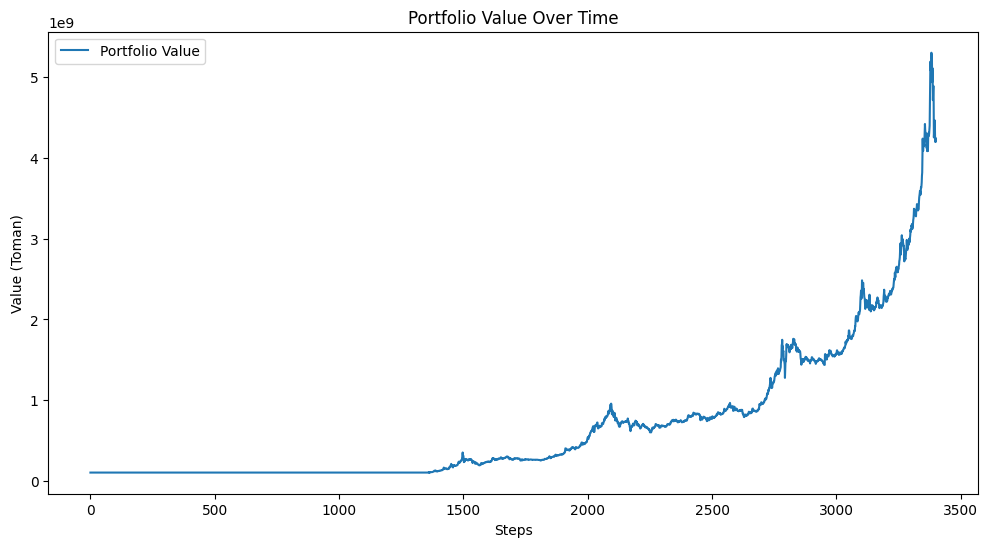

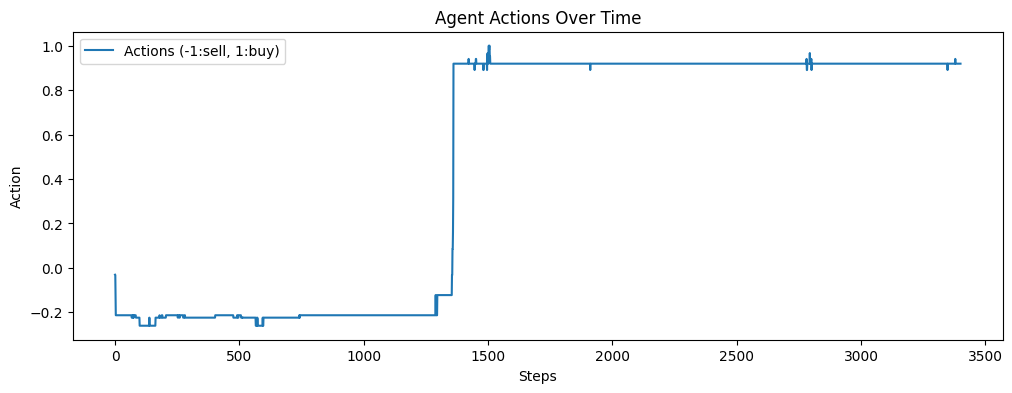

In [ ]:
import matplotlib.pyplot as plt

# نمودار ارزش حساب (portfolio value)
plt.figure(figsize=(12,6))
plt.plot(account_values, label="Portfolio Value")
plt.xlabel("Steps")
plt.ylabel("Value (Toman)")
plt.title("Portfolio Value Over Time")
plt.legend()
plt.show()

# نمودار اکشن‌ها (خرید/فروش)
plt.figure(figsize=(12,4))
plt.plot(actions_taken, label="Actions (-1:sell, 1:buy)")
plt.xlabel("Steps")
plt.ylabel("Action")
plt.title("Agent Actions Over Time")
plt.legend()
plt.show()

==============================
Cell 11: ذخیره و بارگذاری مدل
==============================

In [ ]:
# ذخیره مدل آموزش دیده
agent.save("ppo_gold_agent")
print("Agent saved ✅")

# بارگذاری مدل برای تست مجدد
from stable_baselines3 import PPO
agent_loaded = PPO.load("ppo_gold_agent", env=env)
print("Agent loaded ✅")

Agent saved ✅
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Agent loaded ✅


/usr/local/lib/python3.12/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


==============================
Cell 12: تحلیل نتایج و شاخص‌ها
==============================

In [ ]:
import numpy as np

# محاسبه سود کل
total_profit = account_values[-1] - account_values[0]
print("Total profit:", total_profit)

# محاسبه Drawdown
account_values_np = np.array(account_values)
rolling_max = np.maximum.accumulate(account_values_np)
drawdown = rolling_max - account_values_np
max_drawdown = np.max(drawdown)
print("Maximum Drawdown:", max_drawdown)

# محاسبه نرخ Sharpe ساده (روزانه فرض می‌کنیم)
returns = np.diff(account_values_np) / account_values_np[:-1]
sharpe_ratio = np.mean(returns) / (np.std(returns) + 1e-8) * np.sqrt(252)  # annualized
print("Sharpe ratio:", sharpe_ratio)

Total profit: 4101562799.72
Maximum Drawdown: 1105344000.0000005
Sharpe ratio: 1.2289138389586194


In [ ]:
# سلول 11: محاسبه بازده کل و بازده روزانه
initial_asset = account_values[0]
final_asset = account_values[-1]

# بازده کل
total_return = (final_asset - initial_asset) / initial_asset * 100
print(f"Initial Total Asset: {initial_asset:,.2f}")
print(f"Final Total Asset: {final_asset:,.2f}")
print(f"Total Return: {total_return:.2f}%")

# بازده روزانه
daily_returns = np.diff(account_values) / account_values[:-1]
print(f"Mean Daily Return: {np.mean(daily_returns)*100:.4f}%")
print(f"Std of Daily Return: {np.std(daily_returns)*100:.4f}%")

Initial Total Asset: 104,102,342.00
Final Total Asset: 4,205,665,141.72
Total Return: 3939.93%
Mean Daily Return: 0.1210%
Std of Daily Return: 1.5630%


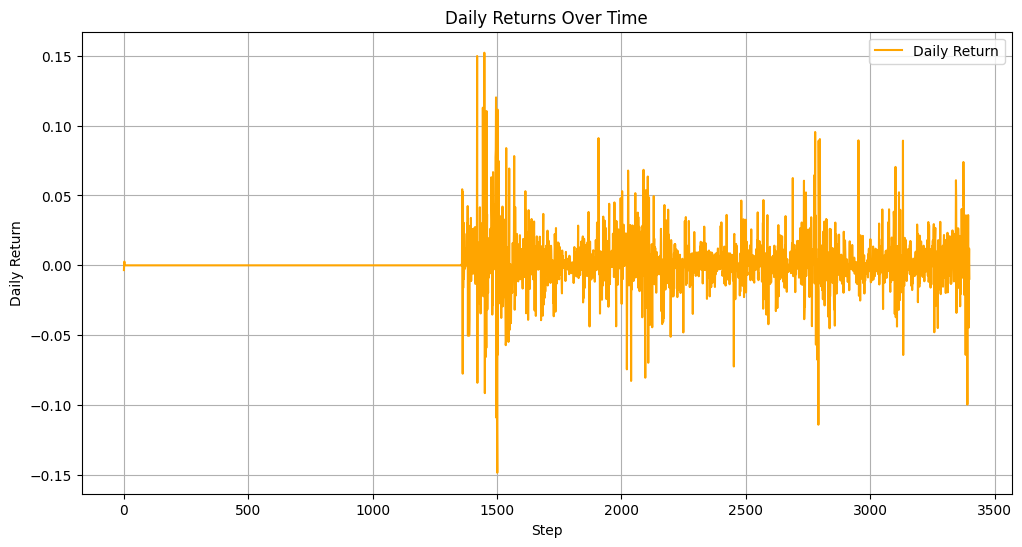

Approximate Annualized Volatility: 24.81%


In [ ]:
# سلول 12: بررسی ریسک و نوسان (Volatility)
plt.figure(figsize=(12,6))
plt.plot(daily_returns, label='Daily Return', color='orange')
plt.xlabel('Step')
plt.ylabel('Daily Return')
plt.title('Daily Returns Over Time')
plt.legend()
plt.grid(True)
plt.show()

# شاخص نوسان
volatility = np.std(daily_returns) * np.sqrt(252)  # annualized volatility approximation
print(f"Approximate Annualized Volatility: {volatility*100:.2f}%")

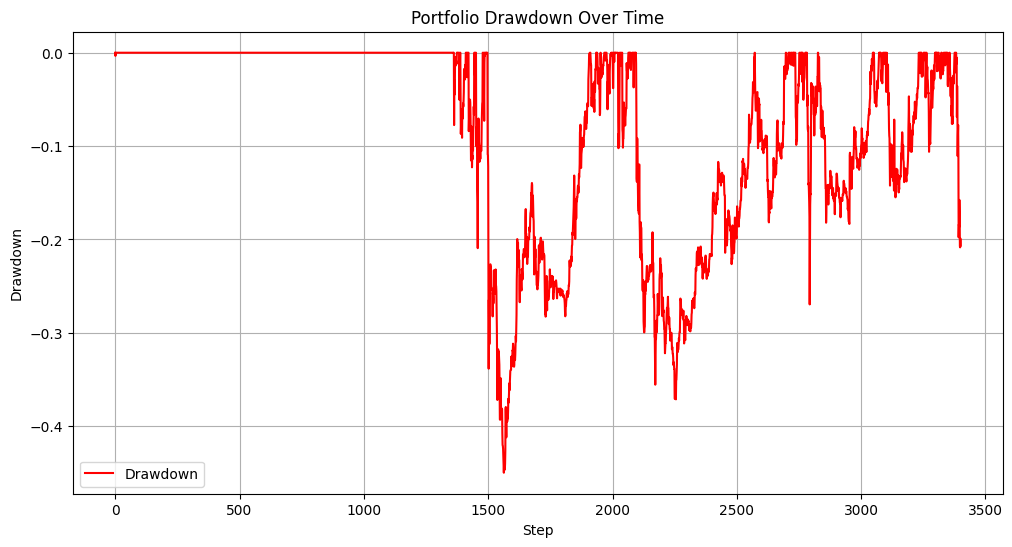

Maximum Drawdown: -45.00%


In [ ]:
# سلول 13: محاسبه Drawdown
cumulative_max = np.maximum.accumulate(account_values)
drawdown = (account_values - cumulative_max) / cumulative_max

plt.figure(figsize=(12,6))
plt.plot(drawdown, label='Drawdown', color='red')
plt.xlabel('Step')
plt.ylabel('Drawdown')
plt.title('Portfolio Drawdown Over Time')
plt.legend()
plt.grid(True)
plt.show()

max_drawdown = drawdown.min()
print(f"Maximum Drawdown: {max_drawdown*100:.2f}%")

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# دارایی واقعی عامل (همونی که در سلول 9 درست کردی)
agent_asset = np.array(account_values_real)   # مثلاً: [100000000, 101200000, ...]

# قیمت طلای 18 عیار (از دیتاست)
price = price_array.flatten()

# سرمایه اولیه واقعی
initial_asset = agent_asset[0]
initial_price = price[0]

# cumulative return عامل
agent_cr = agent_asset / initial_asset - 1

# cumulative return استراتژی ساده buy & hold
bh_cr = price / initial_price - 1

# رسم
plt.figure(figsize=(10,5))
plt.plot(agent_cr, label="RL Agent", linewidth=2)
plt.plot(bh_cr, label="Buy & Hold Gold", linestyle="--")

plt.xlabel("Time Step (Day)")
plt.ylabel("Cumulative Return")
plt.title("Cumulative Return - 18K Gold Iran")
plt.legend()
plt.grid(True)
plt.show()
